In [1]:
%pylab inline
import healpy as hp
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Born approximation map shape: (786432,)
Full ray-traced map shape: (786432,)
Born map statistics: min=-0.023234, max=0.123294, mean=0.000000
Ray-traced map statistics: min=-0.021101, max=0.091235, mean=0.000001


/tmp/ipykernel_118230/2398911757.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


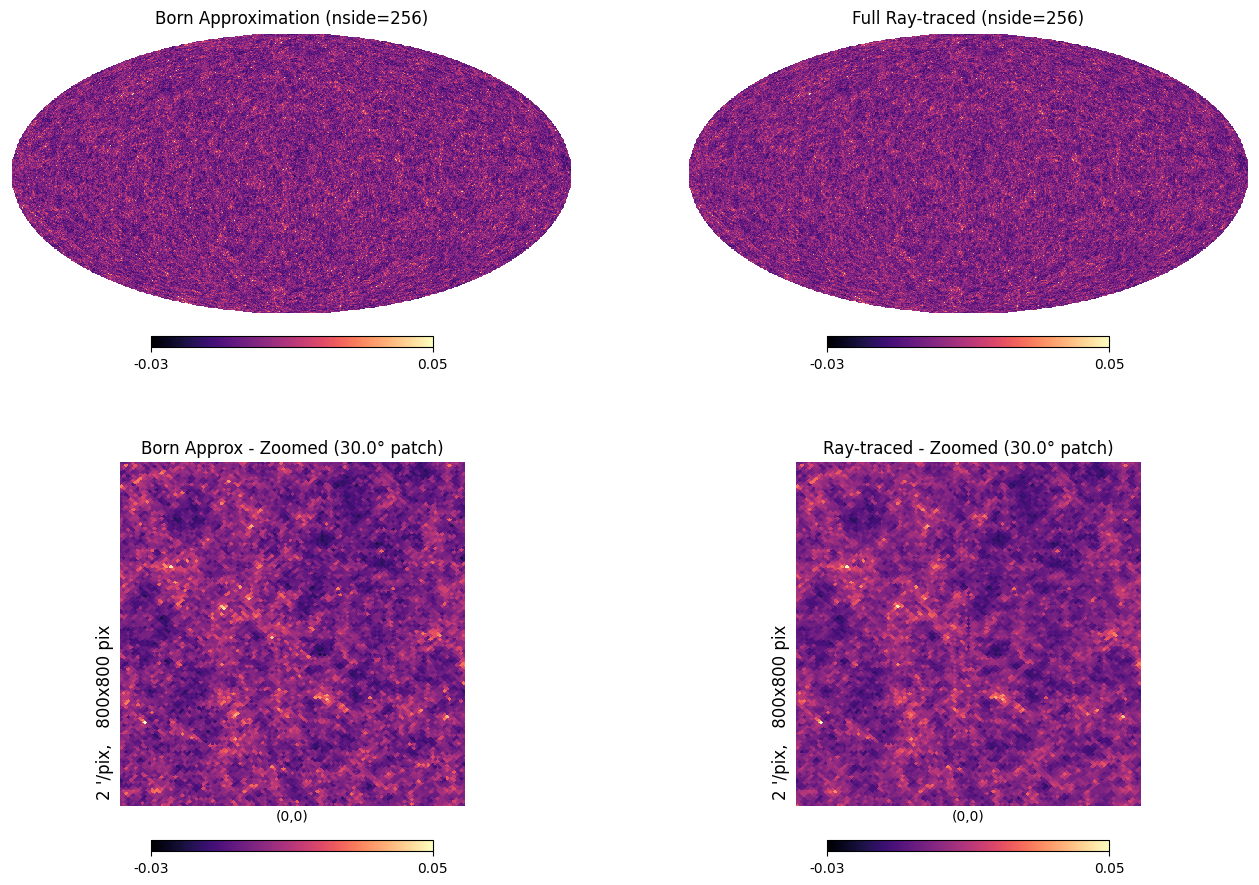


Map statistics (using consistent color scale vmin=-0.03, vmax=0.05):
Born map statistics: min=-0.023234, max=0.123294, mean=0.000000
Ray-traced map statistics: min=-0.021101, max=0.091235, mean=0.000001
Difference map statistics: min=-0.088194, max=0.051828, std=0.001870
Zoomed patches show detailed structure comparison at 30.0° scale


In [16]:
# Load and display the nside=256 convergence maps
import os
import matplotlib.pyplot as plt

# Set up the results directory path
results_dir = '../experiments/results'

# Load the nside=256 maps
born_map = np.load(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born.npy'))
raytraced_map = np.load(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced.npy'))

print(f"Born approximation map shape: {born_map.shape}")
print(f"Full ray-traced map shape: {raytraced_map.shape}")
print(f"Born map statistics: min={born_map.min():.6f}, max={born_map.max():.6f}, mean={born_map.mean():.6f}")
print(f"Ray-traced map statistics: min={raytraced_map.min():.6f}, max={raytraced_map.max():.6f}, mean={raytraced_map.mean():.6f}")

# Display the maps using healpy
nside = 256
fig = plt.figure(figsize=(16, 12))

# Set consistent color scale for all maps
vmin, vmax = -0.03, 0.05

# Born approximation map (full sky)
plt.subplot(2, 2, 1)
hp.mollview(born_map, title='Born Approximation (nside=256)', 
           min=vmin, max=vmax, 
           cmap='magma', hold=True)

# Full ray-traced map (full sky)
plt.subplot(2, 2, 2)
hp.mollview(raytraced_map, title='Full Ray-traced (nside=256)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# Zoomed-in patch parameters
lon_center = 0.0  # longitude in degrees
lat_center = 0.0  # latitude in degrees
reso_arcmin = 2.0  # resolution in arcminutes
size_deg = 30.0   # size of the patch in degrees

# Zoomed Born approximation map
plt.subplot(2, 2, 3)
hp.gnomview(born_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Born Approx - Zoomed ({size_deg}° patch)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# Zoomed ray-traced map
plt.subplot(2, 2, 4)
hp.gnomview(raytraced_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Ray-traced - Zoomed ({size_deg}° patch)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

plt.tight_layout()
plt.show()

# Calculate difference map for analysis
diff_map = raytraced_map - born_map

print(f"\nMap statistics (using consistent color scale vmin={vmin}, vmax={vmax}):")
print(f"Born map statistics: min={born_map.min():.6f}, max={born_map.max():.6f}, mean={born_map.mean():.6f}")
print(f"Ray-traced map statistics: min={raytraced_map.min():.6f}, max={raytraced_map.max():.6f}, mean={raytraced_map.mean():.6f}")
print(f"Difference map statistics: min={diff_map.min():.6f}, max={diff_map.max():.6f}, std={diff_map.std():.6f}")
print(f"Zoomed patches show detailed structure comparison at {size_deg}° scale")

/tmp/ipykernel_118230/2038035338.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


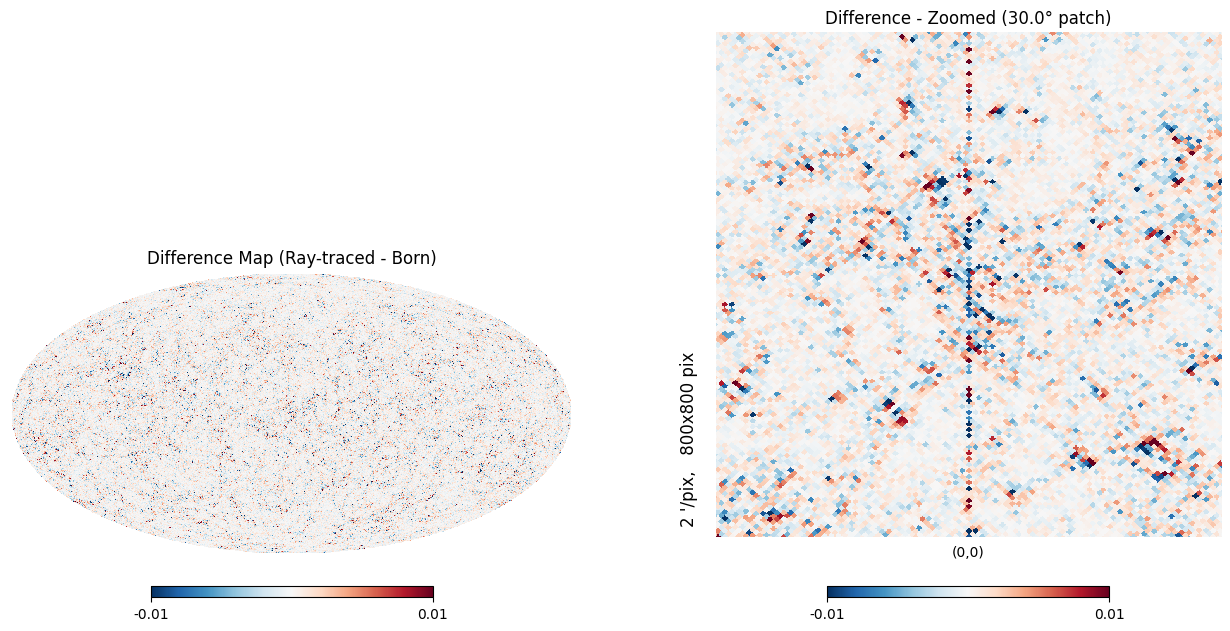

Difference Map Analysis:
  Range: -0.088194 to 0.051828
  Mean: 0.000001
  Standard deviation: 0.001870
  RMS difference: 0.001870
  Mean absolute difference: 0.001147
  90th percentile of |difference|: 0.002541
  99th percentile of |difference|: 0.006954


In [18]:
# Plot the difference between the two maps
fig = plt.figure(figsize=(16, 8))

# Calculate difference map
diff_map = raytraced_map - born_map

# Full sky difference map
plt.subplot(1, 2, 1)
hp.mollview(diff_map, title='Difference Map (Ray-traced - Born)', 
           min=-0.01, max=0.01,
           cmap='RdBu_r', hold=True)

# Zoomed difference map
plt.subplot(1, 2, 2)
hp.gnomview(diff_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Difference - Zoomed ({size_deg}° patch)', 
           min=-0.01, max=0.01,
           cmap='RdBu_r', hold=True)

plt.tight_layout()
plt.show()

print(f"Difference Map Analysis:")
print(f"  Range: {diff_map.min():.6f} to {diff_map.max():.6f}")
print(f"  Mean: {diff_map.mean():.6f}")
print(f"  Standard deviation: {diff_map.std():.6f}")
print(f"  RMS difference: {np.sqrt(np.mean(diff_map**2)):.6f}")

# Calculate some statistics about the magnitude of differences
abs_diff = np.abs(diff_map)
print(f"  Mean absolute difference: {abs_diff.mean():.6f}")
print(f"  90th percentile of |difference|: {np.percentile(abs_diff, 90):.6f}")
print(f"  99th percentile of |difference|: {np.percentile(abs_diff, 99):.6f}")

=== Power Spectrum Comparisons (nside=256) ===


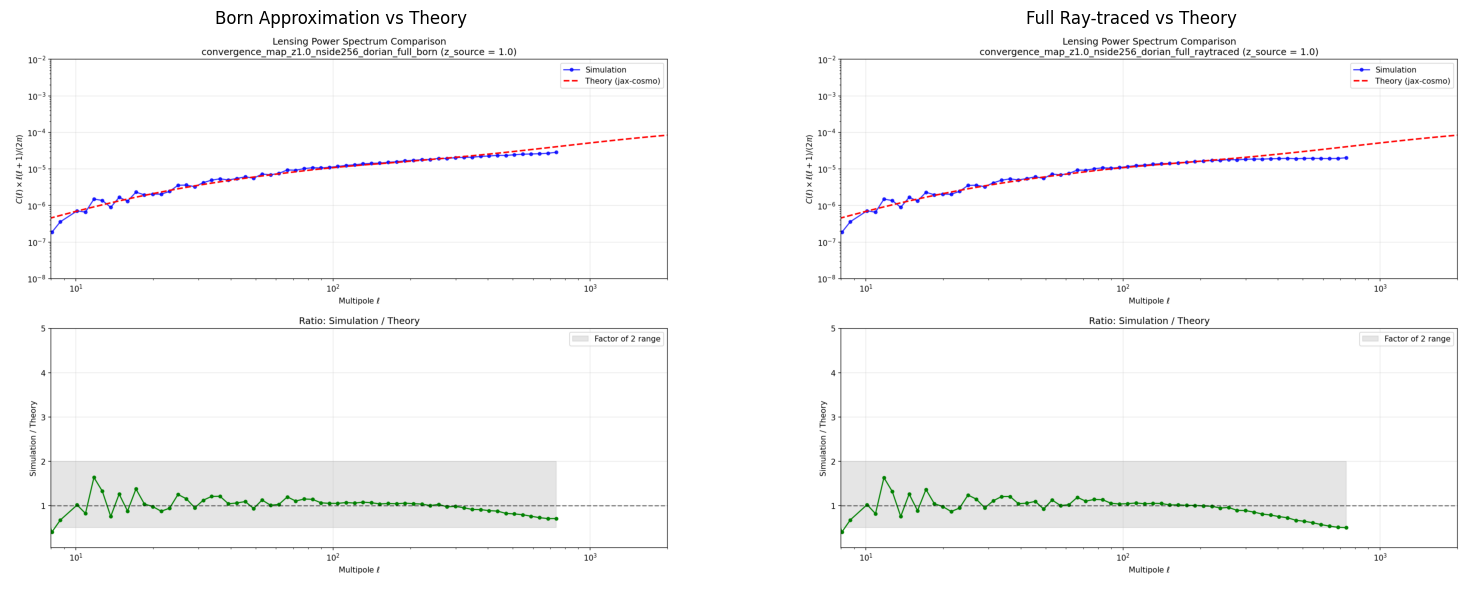

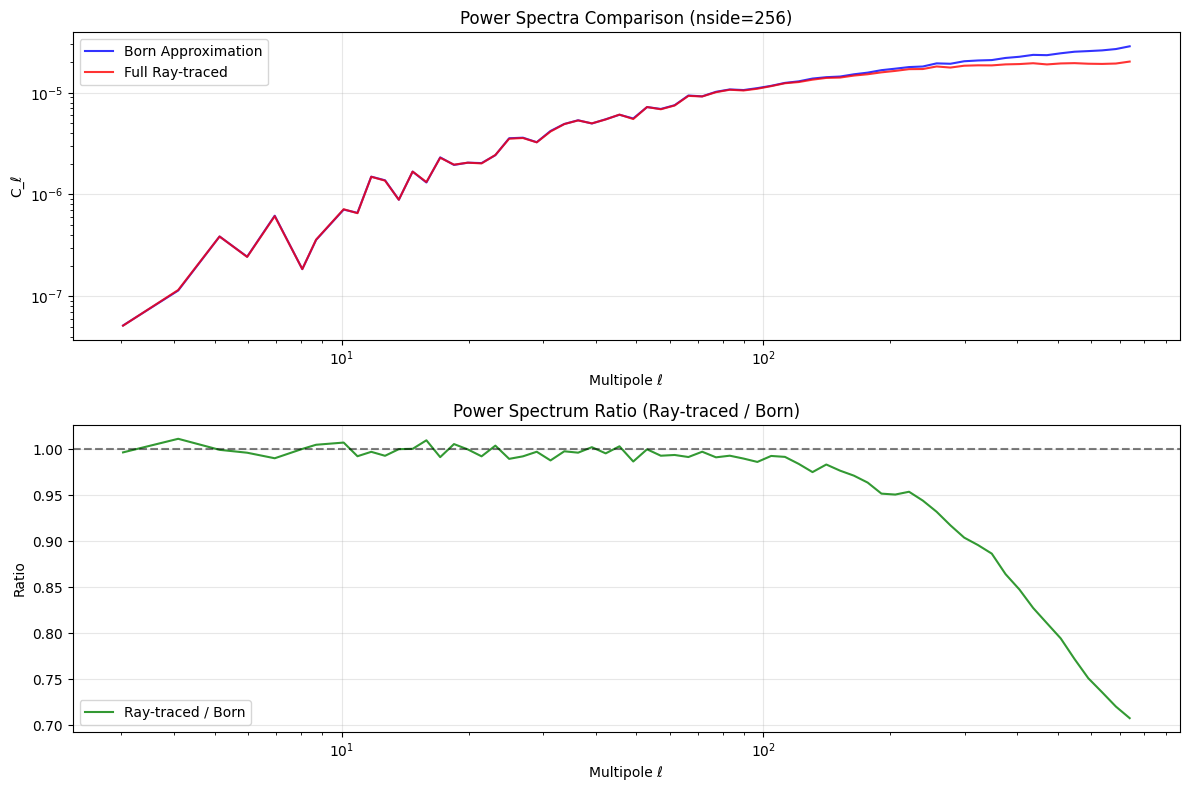

Power spectrum comparison:
  Born Approximation: min C_ℓ = 5.15e-08, max C_ℓ = 2.86e-05
  Full Ray-traced: min C_ℓ = 5.14e-08, max C_ℓ = 2.02e-05
  Ratio range: 0.708 to 1.012


In [15]:
# Display the power spectrum comparison plots
from IPython.display import Image, display
import matplotlib.image as mpimg

# Display the nside=256 power spectrum comparison plots
print("=== Power Spectrum Comparisons (nside=256) ===")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Born approximation theory comparison
born_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born_theory_comparison.png'))
axes[0].imshow(born_img)
axes[0].set_title('Born Approximation vs Theory')
axes[0].axis('off')

# Ray-traced theory comparison
raytraced_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced_theory_comparison.png'))
axes[1].imshow(raytraced_img)
axes[1].set_title('Full Ray-traced vs Theory')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Load and compare the power spectra directly
born_data = np.loadtxt(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born_power_spectrum.txt'))
raytraced_data = np.loadtxt(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced_power_spectrum.txt'))

# Extract ell and C_ell from the loaded data
ell_born = born_data[:, 0]
cl_born = born_data[:, 1]
ell_raytraced = raytraced_data[:, 0]
cl_raytraced = raytraced_data[:, 1]

# Plot power spectra comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.loglog(ell_born[1:], cl_born[1:], 'b-', label='Born Approximation', alpha=0.8)
plt.loglog(ell_raytraced[1:], cl_raytraced[1:], 'r-', label='Full Ray-traced', alpha=0.8)
plt.xlabel('Multipole ℓ')
plt.ylabel('C_ℓ')
plt.title('Power Spectra Comparison (nside=256)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
ratio = cl_raytraced[1:] / cl_born[1:]
plt.semilogx(ell_raytraced[1:], ratio, 'g-', label='Ray-traced / Born', alpha=0.8)
plt.xlabel('Multipole ℓ')
plt.ylabel('Ratio')
plt.title('Power Spectrum Ratio (Ray-traced / Born)')
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Power spectrum comparison:")
print(f"  Born Approximation: min C_ℓ = {cl_born[1:].min():.2e}, max C_ℓ = {cl_born[1:].max():.2e}")
print(f"  Full Ray-traced: min C_ℓ = {cl_raytraced[1:].min():.2e}, max C_ℓ = {cl_raytraced[1:].max():.2e}")
print(f"  Ratio range: {ratio.min():.3f} to {ratio.max():.3f}")